In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from voltagebudget import *
from fakespikes import util as fsutil

In [2]:
t = 0.3

k = 20
t_stim = 0.1
dt = 1e-4
w = 1e-4
a = 10000
ns, ts = util.k_spikes(t_stim, k, w, a=a, dt=dt, seed=None)
print(len(ts))

times = fsutil.create_times(t, dt)

20


In [17]:
N = 20
w_in = 1e-9
w_sigma = w_in / 2.0

bias = 100e-6
bias_sigma = bias / 10.0

f =  50
a = 10e-3
ns_e, ts_e, vs = neurons.lif(t, N, k, ns, ts, w_in, w_sigma, bias, bias_sigma, f, a=a, time_step=dt)

WARNING    Came across an abstract code block that may not be well-defined: the outcome may depend on the order of execution. You can ignore this warning if you are sure that the order of operations does not matter. 2 lines of abstract code, first line is: "g_in += w_in + (w_sigma * randn()) (in-place)"
 [brian2.codegen.generators.base]


Starting simulation at t=0. s for a duration of 300. ms
300. ms (100%) simulated in < 1s


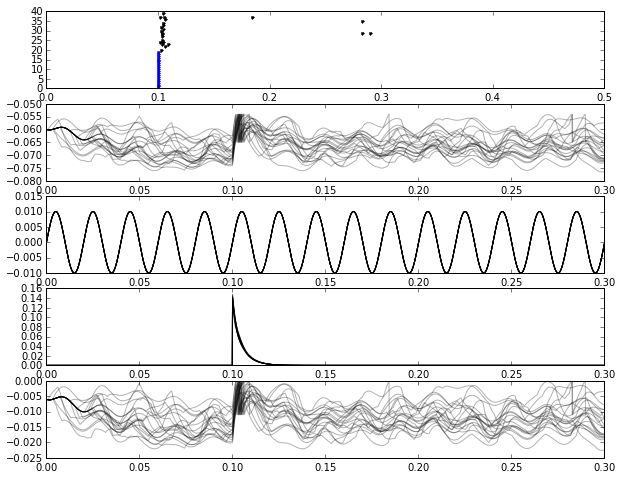

In [18]:
plt.figure(figsize=(10, 8))
plt.subplot(511)
plt.plot(ts, ns, '.b')
plt.plot(ts_e, ns_e + k, '.k')
plt.xlim(0, .5)

plt.subplot(512)
for j in range(20):
    plt.plot(times, vs['vm'][j, :], 'k', alpha=0.3);
    
plt.subplot(513)
for j in range(20):
    plt.plot(times, vs['osc'][j, :], 'k', alpha=0.3);

plt.subplot(514)
for j in range(20):
    plt.plot(times, vs['comp'][j, :], 'k', alpha=0.3);
plt.axhline(0.0, color='k', alpha=0.5)

plt.subplot(515)
for j in range(20):
    plt.plot(times, vs['free'][j, :], 'k', alpha=0.3); 
plt.axhline(0.0, color='k', alpha=0.5)

In [19]:
# Now readout the 'E' response, in another LIF 


In [20]:
N = 100
w_in = 1e-9
w_sigma = 0

bias = 100e-6
bias_sigma = 0

f = 0 # 50
a = 0

ns_out, ts_out, vs = neurons.lif(t, N, k, ns_e, ts_e, w_in, w_sigma, bias, bias_sigma, f, a=a, time_step=dt)

WARNING    Came across an abstract code block that may not be well-defined: the outcome may depend on the order of execution. You can ignore this warning if you are sure that the order of operations does not matter. 2 lines of abstract code, first line is: "g_in += w_in + (w_sigma * randn()) (in-place)"
 [brian2.codegen.generators.base]


Starting simulation at t=0. s for a duration of 300. ms
300. ms (100%) simulated in < 1s


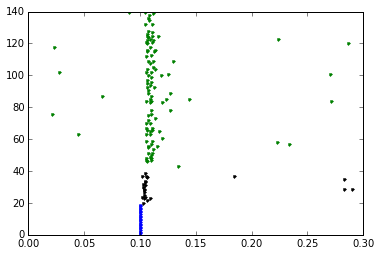

In [21]:
plt.plot(ts, ns, '.b')
plt.plot(ts_e, ns_e + k, '.k')
plt.plot(ts_out, ns_out + k + k + 1, '.g')